#**LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [2]:
## Use the Regression class defined in the previous lab
class regression:
  # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def grad_update(self,w_old,lr,y,x):
        #write code here
        w_new = w_old + 2*lr*(x@(y-((x.T)@w_old)))/x.shape[1]
        return w_new

    def error(self,w,y,x):
        err = np.average((y-(x.T@ w))**2)
        return err# write code here
    def mat_inv(self,y,x_aug):
        w_opt = np.linalg.pinv(x_aug@x_aug.T)@(x_aug@y)
        return w_opt# write code here

      # By Gradient descent

    def Regression_grad_des(self,x,y,lr):
        #w = np.random.uniform(-10,10,size=(np.shape(x)[0],1))
        w = np.zeros((np.shape(x)[0],1))
        err = np.array([])
        for i in range(len(y)):
          # write code here
            err = np.append(err,reg.error(w,y,x))
            w = reg.grad_update(w,lr,y,x)
            dev=np.abs(err[-1]-reg.error(w,y,x))# write code here)
              # print(i)
            if dev<=0.000001:
                break
        w_pred = w
        return w_pred,err


100
(4, 100)
(100, 1)


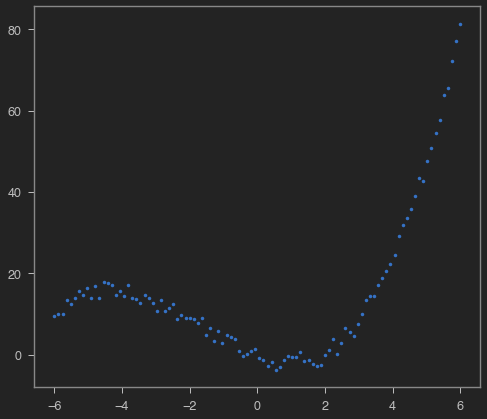

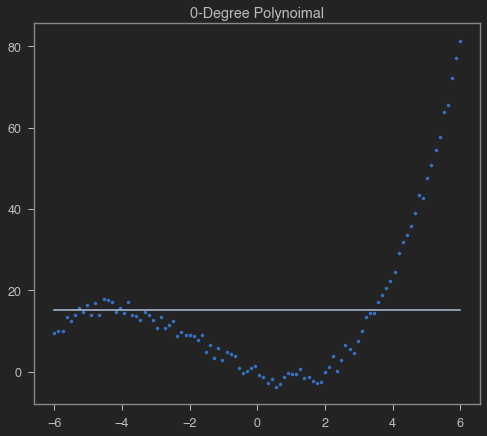

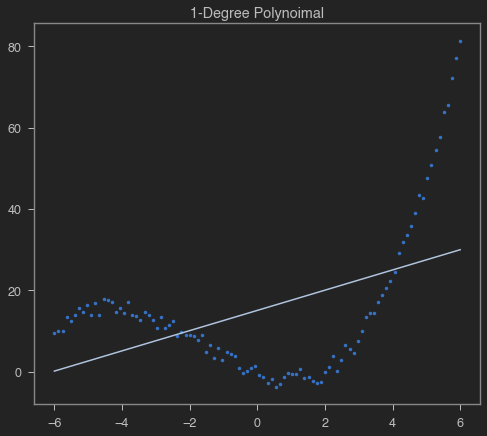

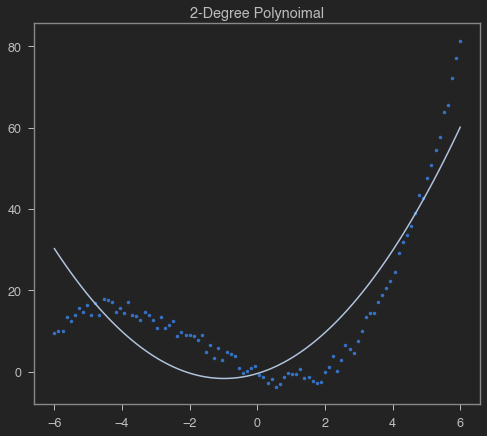

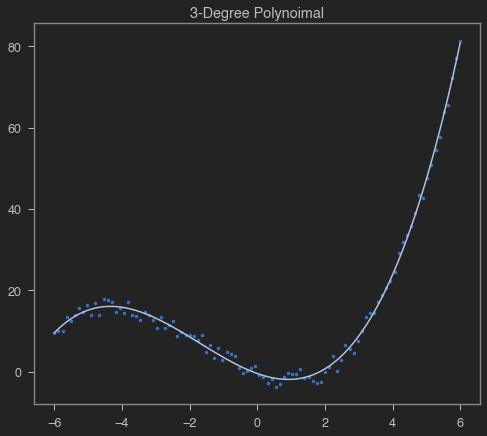

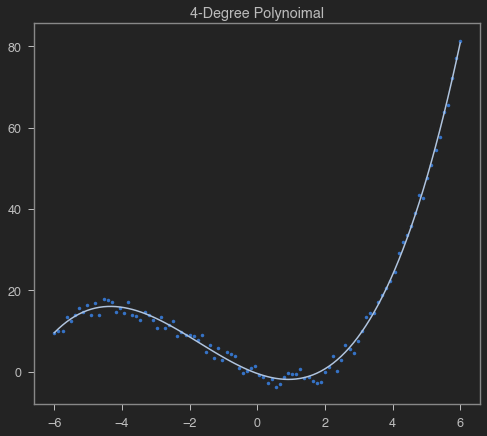

In [3]:
## Data generation

x=np.linspace(-6,6,100)
x=x[np.newaxis,:]
w = [-3,-3,1.25,0.25]## Define Weights as per the given equation
print(np.shape(x)[1])
## Function to transform the data into polynomial

def data_transform(X,degree): 

  ## Write your code here
    X_new = np.array([np.ones(np.shape(X)[1])])
    for i in range(degree):
        X_new = np.append(X_new,X**(i+1),axis=0)
    return X_new


X = data_transform(x,3)
w = np.reshape(w,(len(w),1))
print(X.shape)
y = X.T @ w
print(y.shape)
y = y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# By computation

# Code for degree 0 polynomial fitting

degree = 4
for i in range(degree+1):
    X_1 = data_transform(x,i)
    w_mat=reg.mat_inv(y,X_1)
    y_pred=X_1.T @ w_mat
    plt.figure()
    plt.plot(x.T,y,'.')
    plt.plot(x.T,y_pred,color='lightsteelblue')
    plt.title(str(i)+'-Degree Polynoimal')


(100, 1)
(1, 100)
[[15.09794166]]
(2, 100)
[[15.09794166]
 [ 8.69692296]]
(3, 100)
[[15.09794166]
 [ 8.69692296]
 [13.87121973]]
(4, 100)
[[ 15.09819496]
 [-10.23662562]
 [ 13.87145245]
 [ 20.66530455]]
(5, 100)
[[ 15.09819496]
 [-10.23662562]
 [ 13.29889516]
 [ 20.66530455]
 [  0.57347944]]


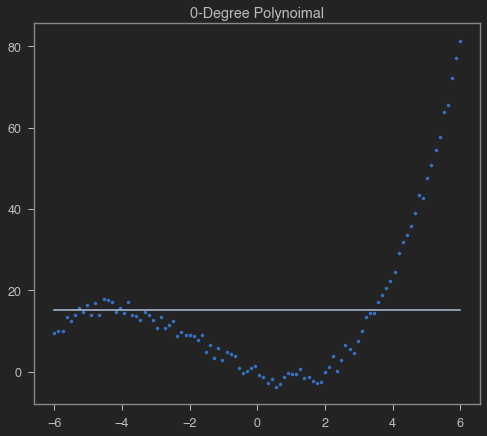

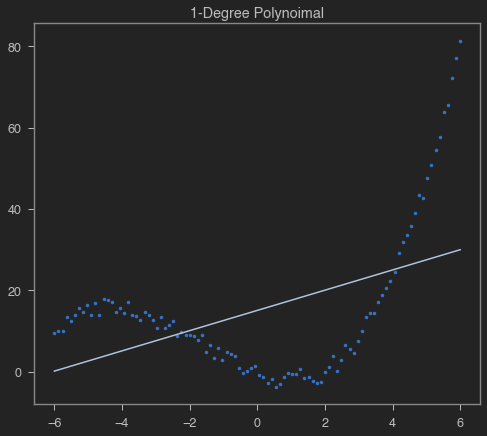

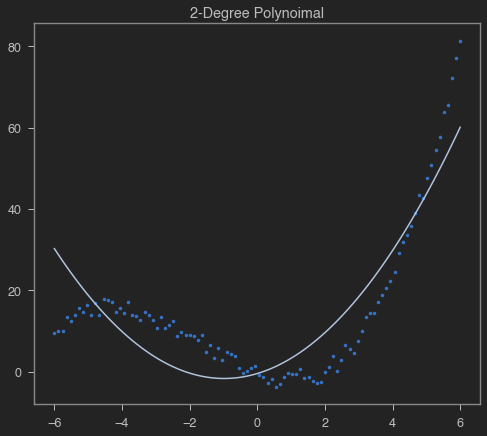

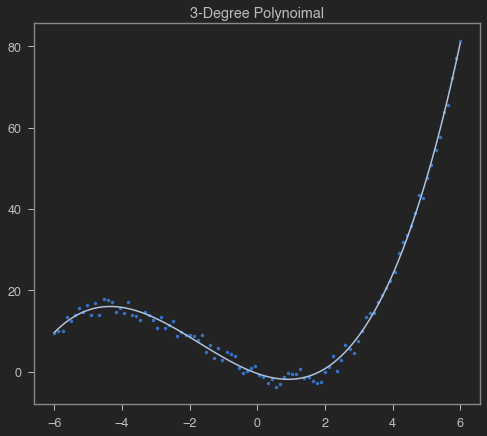

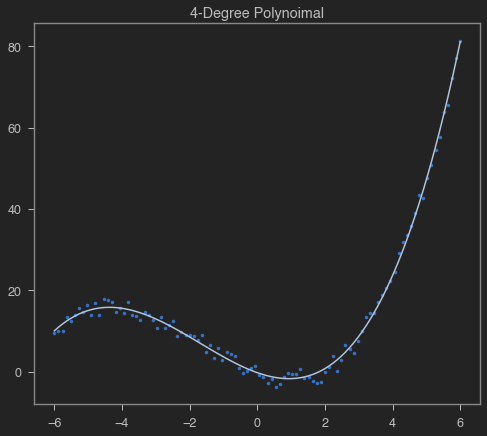

In [4]:
# By Gradient Descent
regret=regression()
degree = 4
print(y.shape)
for i in range(degree+1):
    X_1 = data_transform(x,i)
    for i in range(0,X_1.shape[0]):
            if(len(np.unique(X_1[i,:]))>1):
                X_1[i,:] = ((X_1[i,:] - np.mean(X_1[i,:]))/(np.std(X_1[i,:])))
    print(X_1.shape)
    w_mat,err=regret.Regression_grad_des(X_1,y,0.3)
    y_pred=X_1.T @ w_mat
    print(w_mat)
    plt.figure()
    plt.plot(x.T,y,'.')
    plt.plot(x.T,y_pred,color='lightsteelblue')
    plt.title(str(i)+'-Degree Polynoimal')
    #print(err)
## Write your code here

# Linear Regression

  Generate the data as shown in the figure below


(-0.5, 1.5)

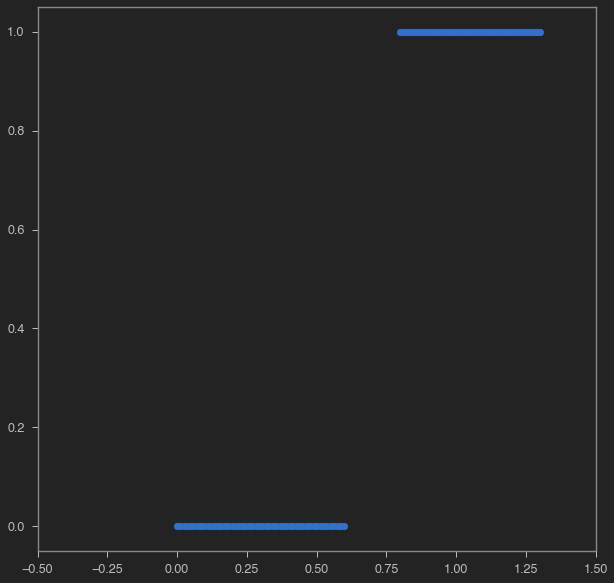

In [5]:
## Write your code here
x = np.append(np.linspace(0,0.6,50),np.linspace(0.8,1.3,50))
x = x[:,np.newaxis]
# print(x.shape)
y = np.zeros(x.shape)
# print(y.shape)
y[50:,0] = 1

plt.figure(figsize=(10,10))
plt.scatter(x,y);
plt.xlim(-0.5,1.5)

  Use the Regression class defined in the previous lab to fit the curve

In [6]:
## Write your Code here
reg = regression()

  Augment the Data and generate optimal weights

In [7]:
## Write your Code here
x_aug = np.append(np.ones((1,x.shape[0])),x.T,axis=0)
w_pred,err=reg.Regression_grad_des(x_aug,y,0.1)
print("Optimal weights obatained by Gradient descent: ",w_pred.T)

Optimal weights obatained by Gradient descent:  [[-0.18958041  1.032718  ]]


Using the optimal weights, fit the curve

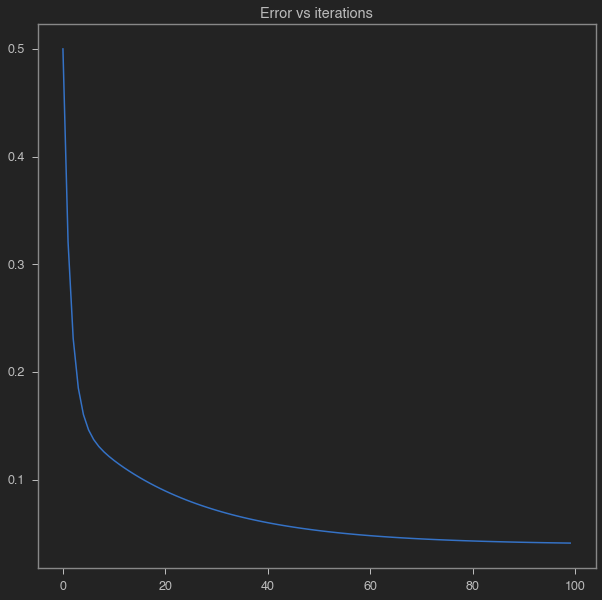

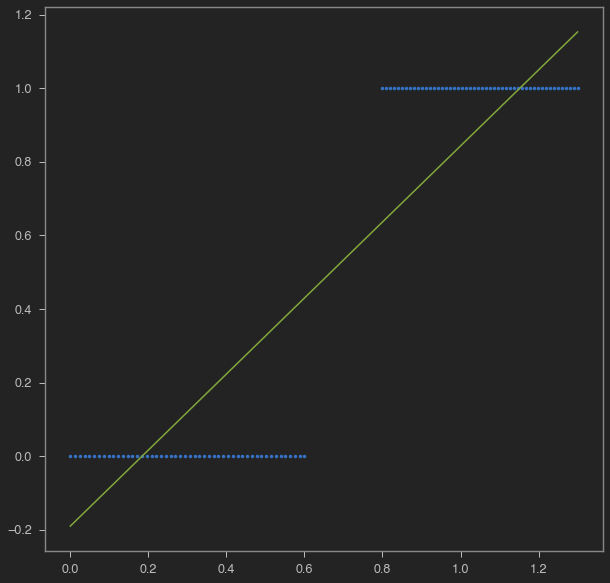

In [8]:
## Write your Code here
plt.figure(figsize=(10,10))
plt.plot(err);
plt.title("Error vs iterations");

plt.figure(figsize=(10,10))
plt.plot(x,y,'.');
x2 = np.linspace(np.min(x),np.max(x),100)
x2 = x2[:,np.newaxis]
x2_aug = np.append(np.ones((1,x2.shape[0])),x2.T,axis=0)
y_pred = x2_aug.T@w_pred
plt.plot(x2,y_pred);

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

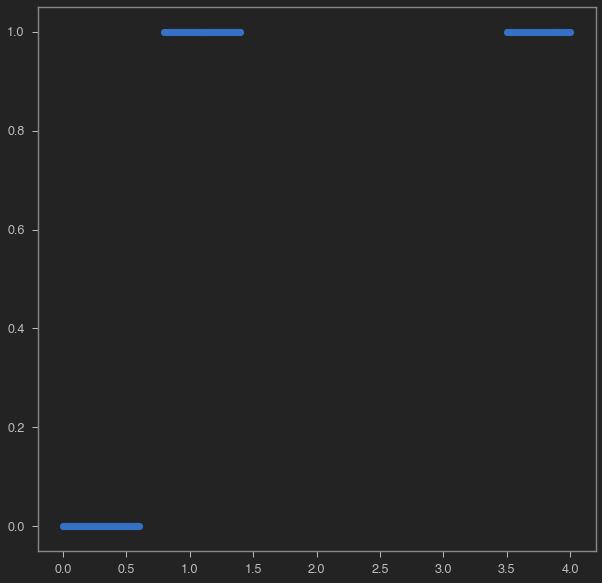

In [9]:
## Write your code here
x = np.append(np.linspace(0,0.6,50),np.linspace(0.8,1.4,40))
x=np.append(x,np.linspace(3.5,4,30))
x = x[:,np.newaxis]
# print(x.shape)
y = np.zeros(x.shape)
# print(y.shape)
y[50:,0] = 1

plt.figure(figsize=(10,10))
plt.scatter(x,y);

Optimal weights obatained by Gradient descent:  [[0.19409398 0.25947461]]


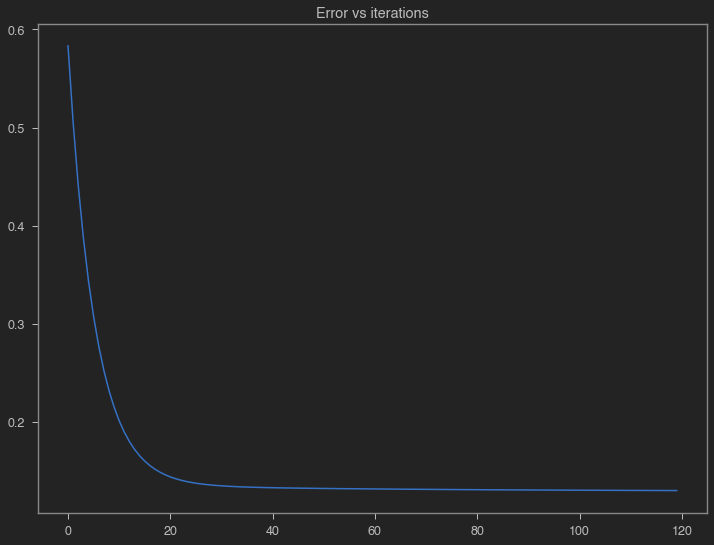

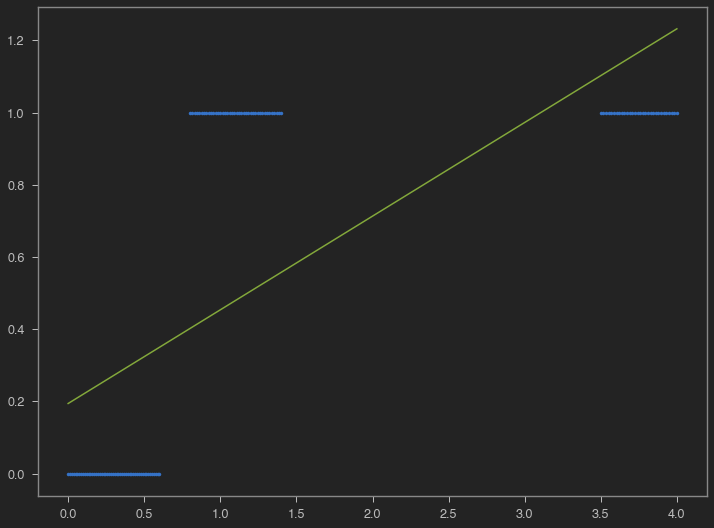

In [10]:
## Write your code here
x_aug = np.append(np.ones((1,x.shape[0])),x.T,axis=0)

# By Gradient descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print("Optimal weights obatained by Gradient descent: ",w_pred.T)

plt.figure(figsize=(12,9))
plt.plot(err);
plt.title("Error vs iterations");

plt.figure(figsize=(12,9))
plt.plot(x,y,'.');
x2 = np.linspace(0,np.max(x),100)
x2 = x2[:,np.newaxis]
x2_aug = np.append(np.ones((1,x2.shape[0])),x2.T,axis=0)
y_pred = x2_aug.T@w_pred
plt.plot(x2,y_pred);

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

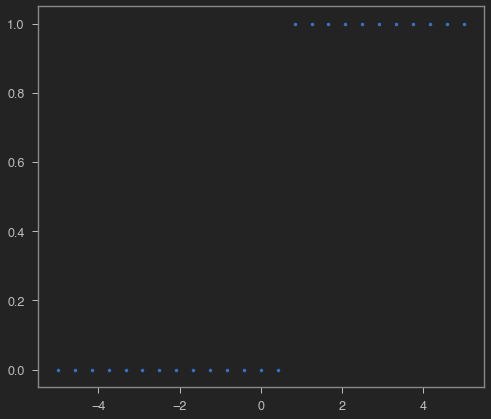

In [11]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [12]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):

  # Compute Mean square error and logistic loss using cost function
  # Write your code here 
    y_pred = 1/(1+np.exp(-w0-w1[i]*x));
    cost_fn_mse = np.append(cost_fn_mse,np.average((y-y_pred)**2)/2);
    cost_fn_logis = np.append(cost_fn_logis,-1*np.average(y*np.log(y_pred+1e-20)+(1-y)*np.log(1-y_pred+1e-20)));

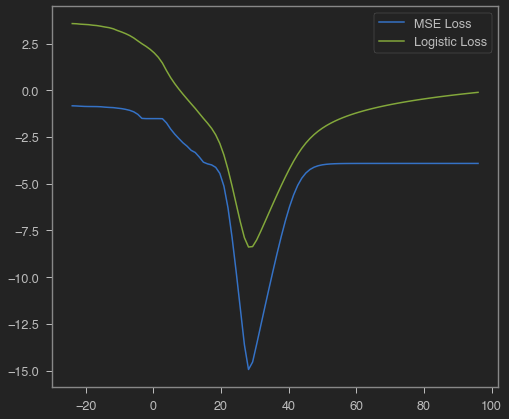

In [13]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

(120, 1)
(120, 1)


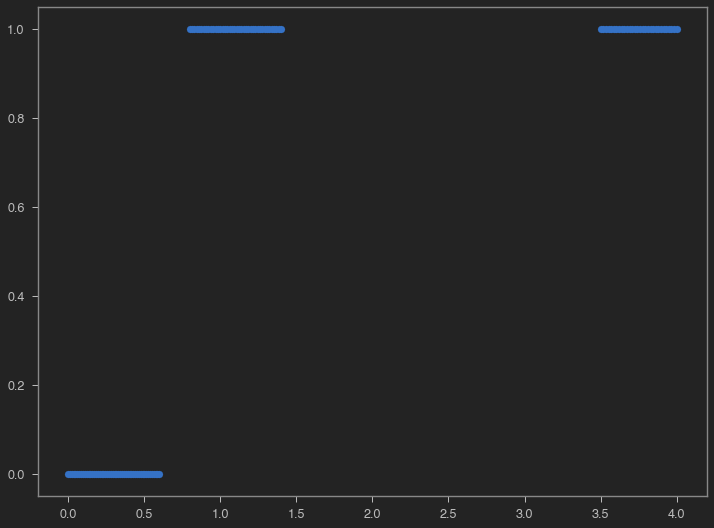

In [14]:
## Write your Code here
x = np.append(np.linspace(0,0.6,50),np.linspace(0.8,1.4,40))
x=np.append(x,np.linspace(3.5,4,30))
x = x[:,np.newaxis]
print(x.shape)
y = np.zeros(x.shape)
print(y.shape)
y[50:,0] = 1

plt.figure(figsize=(12,9))
plt.scatter(x,y);

Define a Logistic Regression class

In [15]:
class logis_regression:
    # Constructor
    def __init__(self, name='reg'):
        self.name = name  # Create an instance variable

    def logis(self,x,w_old):
        # write code here
        op = 1/(1+np.exp(-1*x@w_old));
        return op

    def grad_update(self,w_old,lr,y,x):
        # write code here
        w = w_old - lr*x.T@(self.logis(x,w_old)-y)/x.shape[0];
        return w

    def error(self,w,y,x):
        return -1*np.average(y*np.log(self.logis(x,w)+1e-20)+(1-y)*np.log(1-self.logis(x,w)+1e-20))# write code here

    def Regression_grad_des(self,x,y,lr):
        w=np.zeros((x.shape[1],1));
        err=[];
        for i in range(1000):
            # write code here
            err.append(self.error(w,y,x));
            w = self.grad_update(w,lr,y,x);
            dev=np.abs(self.error(w,y,x)-err[-1]);
            if dev<=10**(-20):
                break
        w_pred = w;
        return w_pred,err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

(120, 2)
Optimal weights obatained by Gradient descent:  [[-3.2882017   4.74809518]]


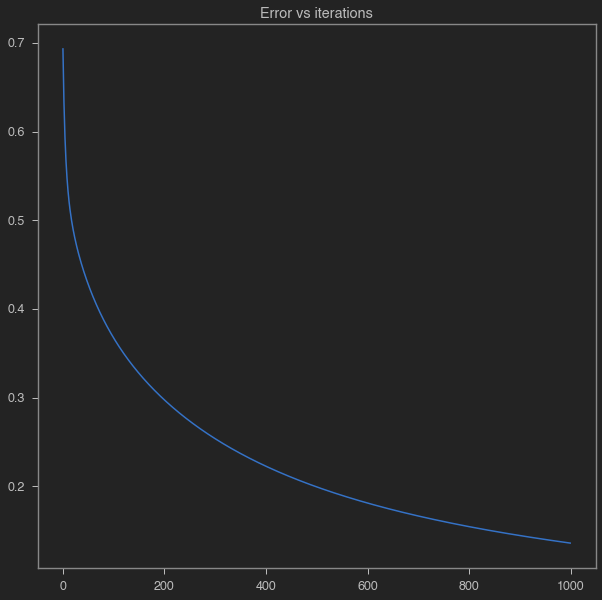

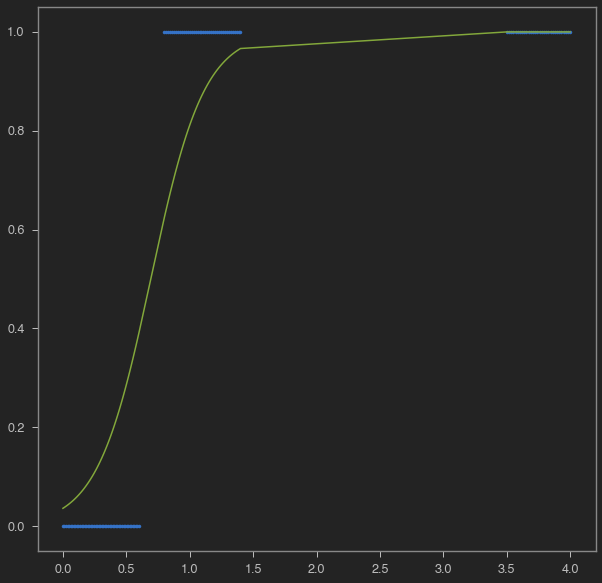

In [16]:
## Write your code here
x_aug = np.append(np.ones((x.shape[0],1)),x,axis=1)
print(x_aug.shape)
lreg=logis_regression()
lr=0.1
w_pred,err=lreg.Regression_grad_des(x_aug,y,lr)
print("Optimal weights obatained by Gradient descent: ",w_pred.T)

plt.figure(figsize=(10,10))
plt.plot(err);
plt.title("Error vs iterations");

y_pred = lreg.logis(x_aug,w_pred)
plt.figure(figsize=(10,10))
plt.plot(x,y,'.');
plt.plot(x,y_pred);

# Classification of circularly separated data using logistic regression



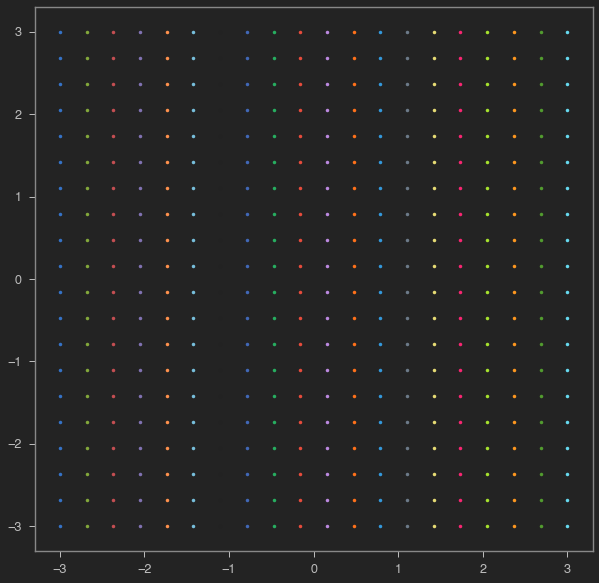

In [17]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.figure(figsize=(10,10))
plt.plot(x11,x22,'.');

  Using the above data generate circular data

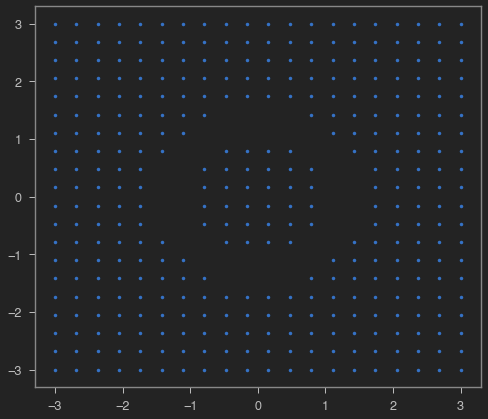

In [18]:
# Write code here
x1 = np.array([])
x2 = np.array([])
y = np.array([])
for i in range(x11.shape[0]):
    for j in range(x22.shape[0]):
        if(x11[i][j]**2 + x22[i][j]**2 <= 1):
            x1 = np.append(x1,x11[i][j])
            x2 = np.append(x2,x22[i][j])
            y = np.append(y,0)
        if(x11[i][j]**2 + x22[i][j]**2 >= 2.25):
            x1 = np.append(x1,x11[i][j])
            x2 = np.append(x2,x22[i][j])
            y = np.append(y,1)
            #plt.plot(x11[i][j],x22[i][j],'.',c='b');
x = np.array([x1,x2])
x = x.T
y = np.reshape(y,(len(x1),1))
plt.plot(x[:,0],x[:,1],'.',c='b');

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

Optimal weights obatained by Gradient descent: 
 [[-2.05490572e+00  6.76425208e-16  6.76002186e-16  3.94698319e-18
   1.61628396e+00  1.61628396e+00]]


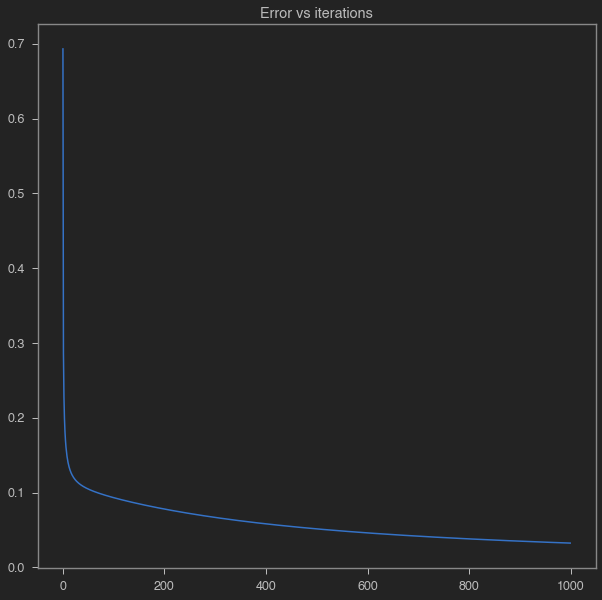

In [19]:
# perform logistic regression
x_aug = np.array([np.ones(len(x1)),x1,x2,x1*x2,x1**2,x2**2])
x_aug = x_aug.T
reg=logis_regression()
lr=0.1
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print("Optimal weights obatained by Gradient descent: \n",w_pred.T)

plt.figure(figsize=(10,10))
plt.plot(err);
plt.title("Error vs iterations");

Plot classification using 0.5 as threshold

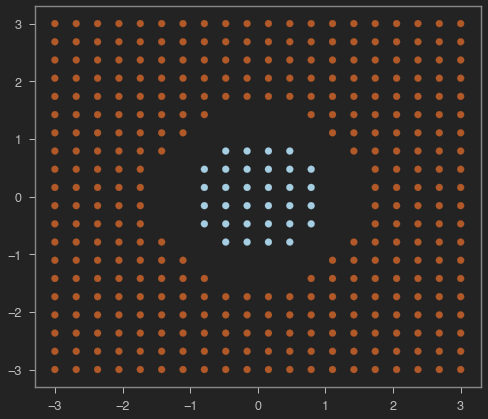

In [20]:
#write code here
y_pred = np.array([])
for i in range(y.shape[0]):
    if((1/(1+np.exp(-1*x_aug[i,:]@w_pred)))>=0.5):
        y_pred = np.append(y_pred,1)
    else:
        y_pred = np.append(y_pred,0)
plt.scatter(x1,x2,c=y,cmap='Paired')

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300, 1)
(300,)


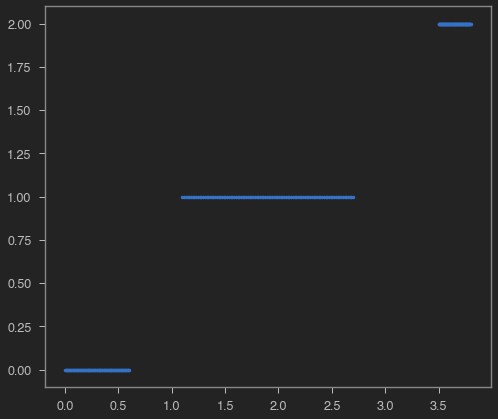

In [21]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))[:,np.newaxis]
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))
print(y.shape)
plt.figure()
plt.plot(x,y,'.')


In [22]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
    X_new=np.array([])      
    for i in range(degree +1):
        X_new = np.append(X_new,X**i)              
    return X_new

x_aug=data_transform(x,2)
x_aug = np.reshape(x_aug,(3,300))
print(x_aug.shape)

(3, 300)


In [23]:
# plot for classification
def plot_op(x,y_pred):

    ind0,_=np.where(y_pred<0.5)
    ind1,_=np.where(y_pred>=0.5)
    x0=x[ind0,:]
    x1=x[ind1,:]
    plt.plot(x0,np.zeros((x0).shape),'o',color='y')
    plt.plot(x1,np.ones((x1).shape),'.',color='r')


Using the above function for plotting, plot the curve using different configurations

Optimal weights obatained by Gradient descent:  [[-3.33922596  0.74779595  2.84819221]]


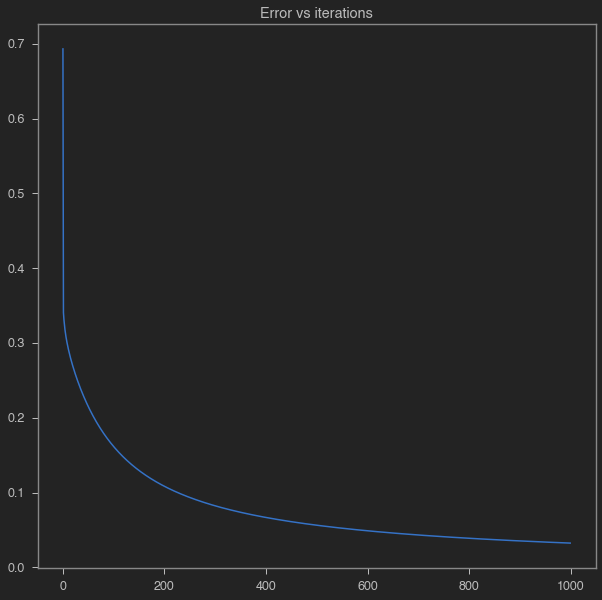

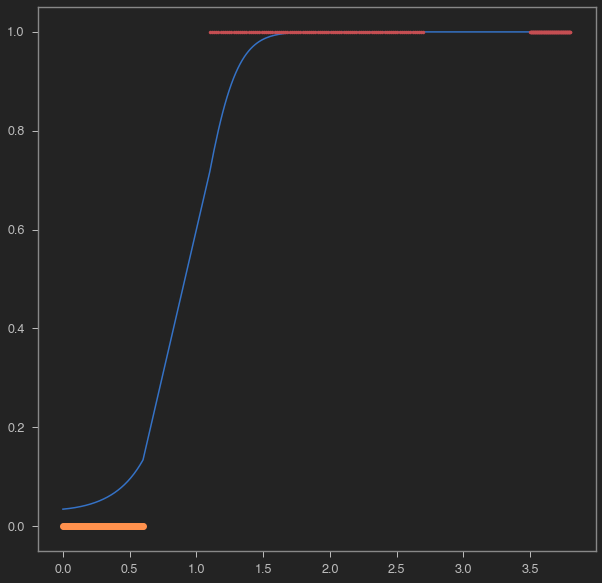

In [24]:
# take class 0 as '0' and other to '1'
## Write your code here
y_tmp = np.array([])
for i in range(len(y)):
    if(y[i] == 0):
        y_tmp = np.append(y_tmp,0)
    else:
        y_tmp = np.append(y_tmp,1)

y_tmp = np.reshape(y_tmp,(len(y_tmp),1))

lreg=logis_regression()
lr=0.1
w_pred1,err=lreg.Regression_grad_des(x_aug.T,y_tmp,lr)
print("Optimal weights obatained by Gradient descent: ",w_pred1.T)
plt.figure(figsize=(10,10))
plt.plot(err);
plt.title("Error vs iterations");

#y_pred = reg.logis(x_aug,w_pred)
y_pred1 = 1/(1+np.exp(-x_aug.T@w_pred1))
plt.figure(figsize=(10,10))
plt.plot(x,y_pred1);
plot_op(x,y_tmp)

Optimal weights obatained by Gradient descent:  [[ 3.04807476 -5.26692489  1.43081929]]


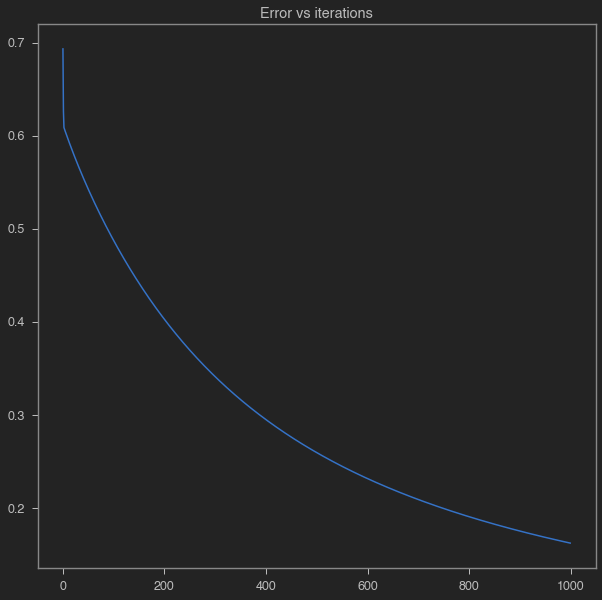

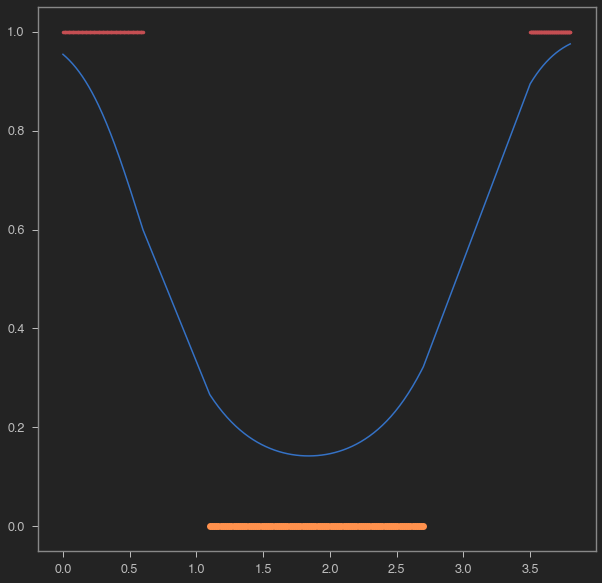

In [29]:
# take class 1 as '0' and other to '1'
## Write your code here
y_tmp = np.array([])
for i in range(len(y)):
    if(y[i] == 1):
        y_tmp = np.append(y_tmp,0)
    else:
        y_tmp = np.append(y_tmp,1)

y_tmp = np.reshape(y_tmp,(len(y_tmp),1))

lreg=logis_regression()
lr=0.1
w_pred2,err=lreg.Regression_grad_des(x_aug.T,y_tmp,lr)
print("Optimal weights obatained by Gradient descent: ",w_pred2.T)

plt.figure(figsize=(10,10))
plt.plot(err);
plt.title("Error vs iterations");

#y_pred = reg.logis(x_aug,w_pred)
y_pred2 = 1/(1+np.exp(-x_aug.T@w_pred2))
plt.figure(figsize=(10,10))
plt.plot(x,y_pred2);
plot_op(x,y_tmp)

Optimal weights obatained by Gradient descent:  [[ 3.86508203  2.85058119 -1.38961688]]


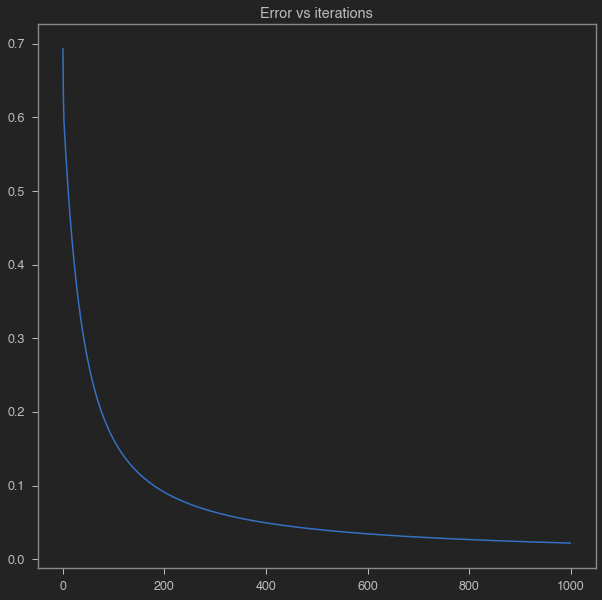

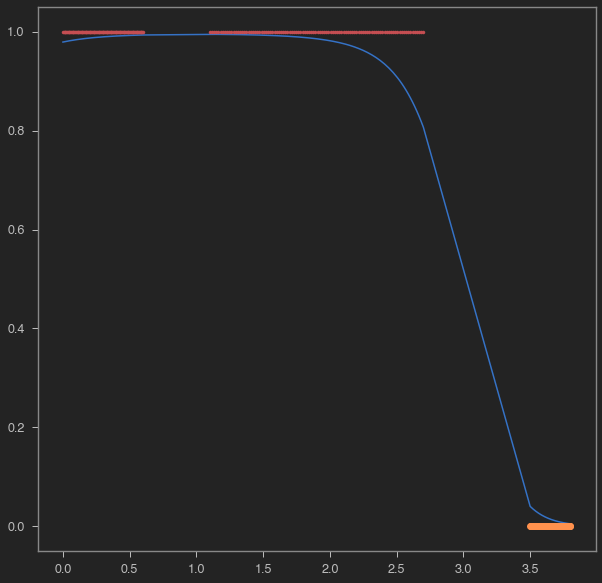

In [26]:
# Take class 2 as '0' and other to '1'
## Write your code here
y_tmp = np.array([])
for i in range(len(y)):
    if(y[i] == 2):
        y_tmp = np.append(y_tmp,0)
    else:
        y_tmp = np.append(y_tmp,1)

y_tmp = np.reshape(y_tmp,(len(y_tmp),1))

lreg=logis_regression()
lr=0.1
w_pred3,err=lreg.Regression_grad_des(x_aug.T,y_tmp,lr)
print("Optimal weights obatained by Gradient descent: ",w_pred3.T)

plt.figure(figsize=(10,10))
plt.plot(err);
plt.title("Error vs iterations");

#y_pred = reg.logis(x_aug,w_pred)
y_pred3 = 1/(1+np.exp(-x_aug.T@w_pred3))
plt.figure(figsize=(10,10))
plt.plot(x,y_pred3);
plot_op(x,y_tmp)

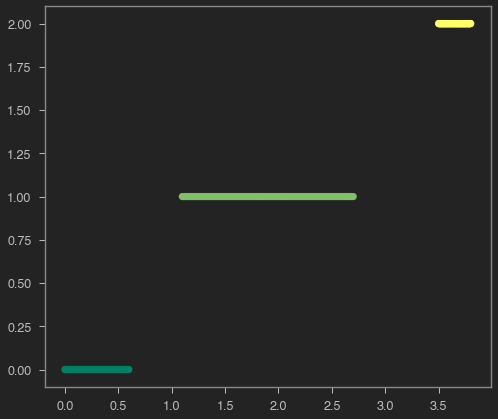

In [28]:
# final classification
## Write your code here
y_pred = np.array([])
tmp = np.column_stack((y_pred1,y_pred2,y_pred3))
y_pred = np.argmax(tmp,axis=1)
#print(y_pred)
plt.scatter(x,y,c=y,cmap='summer')